# 서울시 구별 CCTV 현황 분석
- 구별 인구당 cctv 댓수 파악
- 인구당 cctv수와 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfcc = pd.read_csv('../pandas basic/pandas_datafiles/01. CCTV_in_Seoul.csv')
dfcc.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [3]:
# columns명 바꾸기
dfcc.rename(columns = {'기관명':'구별'}, inplace=True)

In [4]:
dfcc.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
# header : n번째 행이 헤더, usecols : 가져오고 싶은 column의 index지정

dfpop = pd.read_excel('../pandas basic/pandas_datafiles/01. population_in_Seoul.xls', header=2,
                     usecols= [1,3,6,9,13])
dfpop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [6]:
dfpop.columns = ['구별','인구수','한국인','외국인','고령자']
dfpop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [7]:
# CCTV 수를 기준으로 구를 정렬
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구
# 인구당 cctv 수가 가장 높은 구 상위 5개
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는?


In [8]:
# CCTV 수를 기준으로 구를 정렬
dfcc.sort_values('소계',ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


In [9]:
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구
dfcc.sort_values('2016년',ascending=False).head(5)['구별']

0      강남구
22     종로구
4      관악구
10    동대문구
8      노원구
Name: 구별, dtype: object

In [10]:
# 인구당 cctv 수가 가장 높은 구 상위 5개
df = pd.merge(dfcc, dfpop, on='구별', how = 'inner')
df['cctv비율'] = df['소계'] / df['인구수']
df.sort_values('cctv비율', ascending=False).head(5)['구별']

20    용산구
22    종로구
23     중구
0     강남구
14    서초구
Name: 구별, dtype: object

In [11]:
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는?
df['외국인비율'] =  df['외국인'] / df['인구수'] 
df['고령자비율'] =  df['고령자'] / df['인구수']
df[['고령자비율','외국인비율','소계']].corr()

,고령자비율,외국인비율,소계
고령자비율,1.000000,0.267348,-0.280786
외국인비율,0.267348,1.000000,-0.136074
소계,-0.280786,-0.136074,1.000000


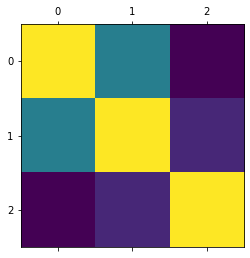

In [12]:
plt.matshow(df[['고령자비율','외국인비율','소계']].corr())

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,cctv비율,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.004873,0.008677,0.110722
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.001706,0.009298,0.120516
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,0.002265,0.010618,0.166003
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.001464,0.010805,0.120158
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,0.002847,0.034846,0.129553
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0,0.001900,0.040179,0.113428
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,0.003485,0.070080,0.126895
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,0.003979,0.073423,0.129253
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.002222,0.006707,0.126349
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.001391,0.005785,0.147175


In [13]:
# 강사님
# CCTV 수를 기준으로 구를 정렬
dfcc.sort_values('소계')

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


In [18]:
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구
dfcc['16증가율'] = (dfcc['2016년'] - dfcc['2015년']) / dfcc['2015년']
dfcc.sort_values('16증가율',ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,16증가율
18,양천구,2034,1843,142,30,467,14.566667
9,도봉구,485,238,159,42,386,8.190476
17,송파구,618,529,21,68,463,5.808824
23,중구,671,413,190,72,348,3.833333
13,서대문구,962,844,50,68,292,3.294118


In [24]:
# 인구당 cctv 수가 가장 높은 구 상위 5개
merge_df = pd.merge(dfcc, dfpop, on='구별')
merge_df['인구당cctv수'] = merge_df['소계']/ merge_df['인구수']
merge_df.sort_values('인구당cctv수', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,16증가율,인구수,한국인,외국인,고령자,인구당cctv수
20,용산구,1624,1368,218,112,398,2.553571,244203.0,229456.0,14747.0,36231.0,0.006650
22,종로구,1002,464,314,211,630,1.985782,162820.0,153589.0,9231.0,25425.0,0.006154
23,중구,671,413,190,72,348,3.833333,133240.0,124312.0,8928.0,20764.0,0.005036
0,강남구,2780,1292,430,584,932,0.595890,570500.0,565550.0,4950.0,63167.0,0.004873
14,서초구,1930,1406,157,336,398,0.184524,450310.0,445994.0,4316.0,51733.0,0.004286


In [27]:
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는?
merge_df['외국인비율'] = merge_df['외국인'] / merge_df['인구수']
merge_df['고령자비율'] = merge_df['고령자'] / merge_df['인구수']
merge_df.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,16증가율,인구수,한국인,외국인,고령자,인구당cctv수,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,0.595890,570500.0,565550.0,4950.0,63167.0,0.004873,0.008677,0.110722
1,강동구,773,379,99,155,377,1.432258,453233.0,449019.0,4214.0,54622.0,0.001706,0.009298,0.120516


In [29]:
merge_df[['인구당cctv수','인구수','외국인비율','고령자비율']].corr()

,인구당cctv수,인구수,외국인비율,고령자비율
인구당cctv수,1.000000,-0.514143,0.406199,0.290528
인구수,-0.514143,1.000000,-0.591939,-0.669462
외국인비율,0.406199,-0.591939,1.000000,0.267348
고령자비율,0.290528,-0.669462,0.267348,1.000000
